## Problem 1

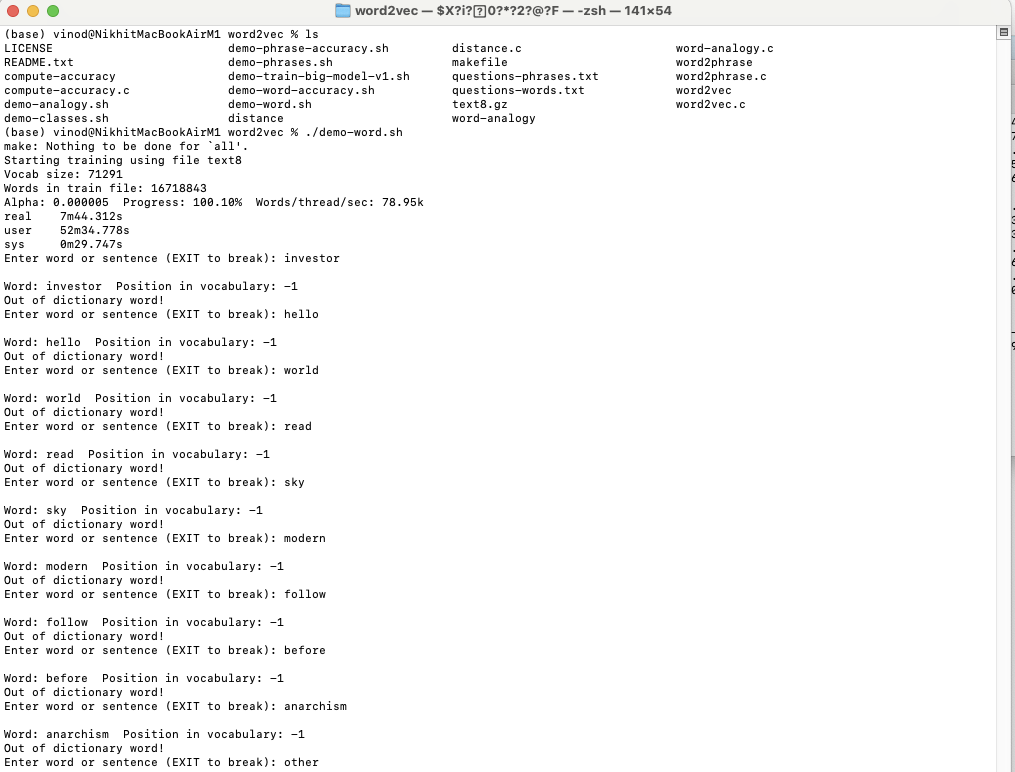

## Problem 2

In what follows we will demonstrate similarity and analogy reasoning using Gensim a Python API for NLP. We will download Glove vectors, which are somewhat better than Word2Vec vectors but otherwise quite similar. 

In [ ]:
!pwd


In [15]:
import numpy as np
import gensim
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

You can download the GloVe vectors from the Glove
page (https://nlp.stanford.edu/projects/glove/). They're inside this zip file
(https://nlp.stanford.edu/data/glove.6B.zip)
Pleasse expand that file. We will use 100 dimensional vectors for speed of execution sake.
Gensim imports those vectors and then transform them into Word2Vec format.

In [16]:
#glove_file = datapath('C:\code\codedl_09_Spacy_NLTK_Gensim\glove.6B.100d.txt')
glove_file = datapath('/Users/vinod/cse89/glove.6B/glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/var/folders/qv/ycqjsbr569s7x5n7xv56_q3c0000gr/T/ipykernel_62577/3629005883.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 300)

In [17]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [18]:
model.most_similar('france')

[('french', 0.7344761490821838),
 ('paris', 0.6580672860145569),
 ('belgium', 0.620672345161438),
 ('spain', 0.5735931992530823),
 ('italy', 0.5643460154533386),
 ('germany', 0.5567398071289062),
 ('prohertrib', 0.556422233581543),
 ('britain', 0.5553334951400757),
 ('chirac', 0.5362643599510193),
 ('switzerland', 0.5320892333984375)]

In [19]:
model.most_similar('raspberry')

[('apricot', 0.6166368722915649),
 ('blueberry', 0.5871517062187195),
 ('raspberries', 0.5616854429244995),
 ('sorbet', 0.5566381812095642),
 ('peach', 0.5461963415145874),
 ('strawberry', 0.5326632261276245),
 ('cranberry', 0.525632917881012),
 ('cherry', 0.5129302144050598),
 ('caramel', 0.5071442127227783),
 ('cheesecake', 0.4990377426147461)]

In [20]:
result = model.most_similar(positive=['woman', 'prince'], negative=['man'])

In [21]:
print("{}: {:.4f}".format(*result[2]))

queen: 0.5314


In [22]:
def analogy(x1, x2, y1):
	result = model.most_similar(positive=[y1, x2], negative=[x1])
	return result[0][0]

In [23]:
analogy('france', 'paris', 'russia')

'moscow'

In [24]:
analogy('france', 'paris', 'india')

'delhi'

In [25]:
analogy('france', 'paris', 'australia')

'sydney'

In [26]:
analogy('france', 'paris', 'kenya')

'nairobi'

In [27]:
analogy('japan', 'japanese', 'australia')

'australian'

In [28]:
analogy('usa', 'whiskey', 'france')

'cognac'

In [29]:
analogy('tall', 'tallest', 'long')

'longest'

In [30]:
analogy('good', 'fantastic', 'bad')

'horrible'

In [31]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [32]:
def display_pca_scatterplot(model, words=None, sample=0):
	if words == None:
		if sample > 0:
			words = np.random.choice(list(model.vocab.keys()), sample)
		else:
			words = [ word for word in model.vocab ]
	word_vectors = np.array([model[w] for w in words])
	twodim = PCA().fit_transform(word_vectors)[:,:2]
	plt.figure(figsize=(6,6))
	plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
	for word, (x,y) in zip(words, twodim):
		plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


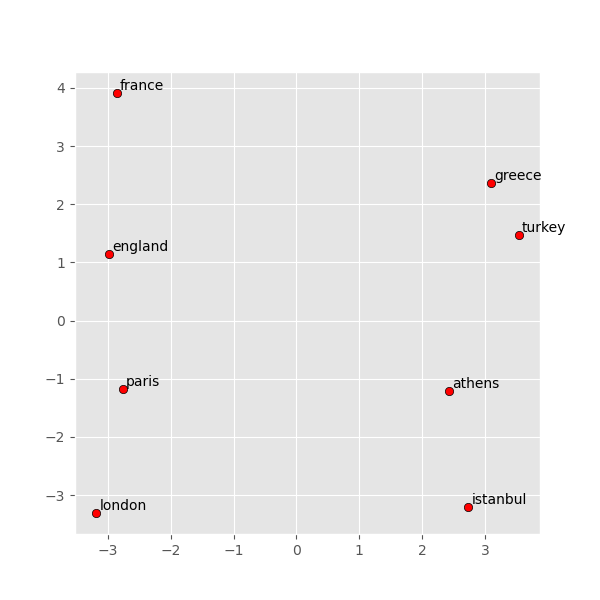

In [33]:
display_pca_scatterplot(model,['turkey','istanbul','greece','athens','england','london','france','paris'])

In [34]:
from gensim.models import Word2Vec

In [ ]:
glove_file = datapath('./GoogleNews-vectors-negative300.bin.gz')
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
#glove2word2vec(glove_file, word2vec_glove_file)
glove2word2vec(glove_file)

In [35]:
model1 = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)  

In [36]:
def analogy1(x1, x2, y1):
	result = model.most_similar(positive=[y1, x2], negative=[x1])
	return result[0][0]

In [37]:
analogy1('france', 'paris', 'italy')

'rome'

In [38]:
analogy1('france', 'paris', 'india')

'delhi'

In [39]:
analogy1( 'france', 'paris','usa')

'd.c.'

In [71]:
def display_pca_scatterplot(model, words=None, sample=0):
	if words == None:
		if sample > 0:
			words = np.random.choice(list(model.vocab.keys()), sample)
		else:
			words = [ word for word in model.vocab ]
	word_vectors = np.array([model[w] for w in words])
	twodim = PCA().fit_transform(word_vectors)[:,:2]
	plt.figure(figsize=(6,6))
    
	plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
	plt.plot(twodim[:,0], twodim[:,1])
	for word, (x,y) in zip(words, twodim):
		plt.text(x+0.05, y+0.05, word)
	
        


<IPython.core.display.Javascript object>


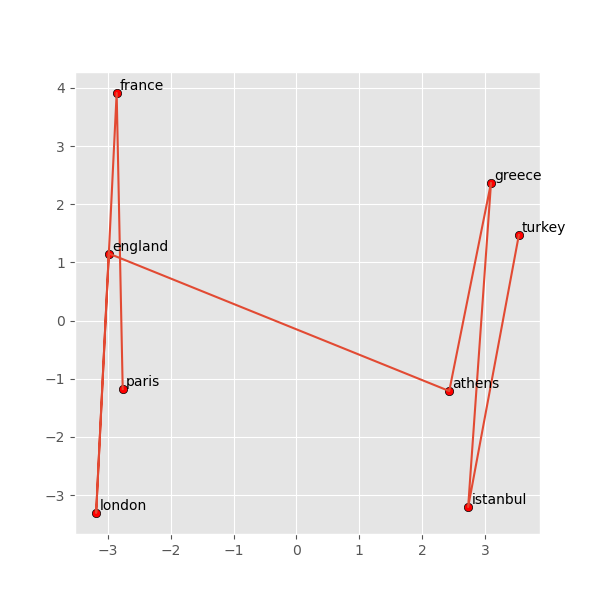

In [72]:
display_pca_scatterplot(model,['turkey','istanbul','greece','athens','england','london','france','paris'])

## Problem 3

In [75]:
import spacy

nlp = spacy.load("en_core_web_lg")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 75.254234 False
cat True 63.188496 False
banana True 31.620354 False
afskfsd False 0.0 True


In [76]:
nlp = spacy.load("en_core_web_lg")  # make sure to use larger model!
tokens = nlp("dog cat banana")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.8220816850662231
dog banana 0.2090904861688614
cat dog 0.8220816850662231
cat cat 1.0
cat banana 0.2235882729291916
banana dog 0.2090904861688614
banana cat 0.2235882729291916
banana banana 1.0


In [97]:
import spacy

nlp = spacy.load("./word2vecspacy")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 24.63087 False
cat True 23.41732 False
banana True 19.615652 False
afskfsd False 0.0 True


In [99]:
nlp = spacy.load("./word2vecspacy")  # Word 2 vec vectors imported into Spacy
tokens = nlp("dog cat banana")
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.5256724953651428
dog banana -0.01445097103714943
cat dog 0.5256724953651428
cat cat 1.0
cat banana 0.03429926559329033
banana dog -0.01445097103714943
banana cat 0.03429926559329033
banana banana 1.0


# The Similarity is better with "en_core_web_lg" vs that of word2vec vectos imported into Spacy